In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
def make_blank_df(edge=59,step=0.5):

    #get the values of x,y, and B for every point on the grid
    pos = np.arange(-edge,edge+1,step)
    vals = [(x,y) for x in pos for y in pos]
    vals = np.array(vals)

    #now make a pandas df and fill it with the grid values
    col_names =  ['x', 'y']
    df  = pd.DataFrame(columns = col_names)
    df['x'] = vals[:,0]
    df['y'] = vals[:,1]
    
    #force float type
    df["x"] = df["x"].astype('float')
    df["y"] = df["y"].astype('float')
    
    
    return df
df_blank = make_blank_df()
df_blank['test'] = df_blank['x']*df_blank['y']
df_blank.head()

,x,y,test
0,-59.0,-59.0,3481.0
1,-59.0,-58.5,3451.5
2,-59.0,-58.0,3422.0
3,-59.0,-57.5,3392.5
4,-59.0,-57.0,3363.0


In [45]:
def get_avg_val(df,x,y,width,xvar='x',yvar='y',zvar='acc'):
    """
    This function takes in a dataframe with a 2d histogram structure (xvar,yvar,zvar)
    and a point in the 2d grid (x,y).
    It computes a z value at x and y, based on the mean value of zvar in the surrounding space
    
    Notes: The size of the neighborhood is specified (width).
    if width is too small for the input df, such that any value of x,y can fall between the grid points,
    then width is increased to match the input grid spacing
    """
    #ensure the search width is positive
    width = abs(width)
    
    #dont want to fall inbetween the cracks
    #find the spacing of the grid of the input df
    width_lim = abs(df.x.unique()[0] - df.x.unique()[1])/2.0
    #if the specified width is less than limit, set the former equal to the latter
    if (width<width_lim):
        width=width_lim
    
    #define the search region
    mask = (df[xvar] <= (x + width)) & (df[xvar] >= (x - width)) & (df[yvar] <= (y + width)) & (df[yvar] >= (y - width))
    df_region = df.copy()
    df_region = df_region[mask]
    
    #get the average value of var within the search region
    z = df_region[zvar].mean()

    return z

In [47]:
get_avg_val(df_blank,1.2,1.2,0.001,zvar='test')

1.0

In [79]:
def rebin_df(df,edge=59,step=0.5,xvar='x',yvar='y',zvar='acc'):
    
    #get the values of x,y, and B for every point on the grid
    pos = np.arange(-edge,edge+1,step)
    vals = [(x,y,get_avg_val(df,x,y,step,xvar=xvar,yvar=yvar,zvar=zvar)) for x in pos for y in pos]
    vals = np.array(vals)

    #now make a pandas df and fill it with the grid values
    col_names =  [xvar, yvar, zvar]
    new_df  = pd.DataFrame(columns = col_names)
    new_df['x'] = vals[:,0]
    new_df['y'] = vals[:,1]
    new_df[zvar] = vals[:,2]
    
    #force float type
    new_df[xvar] = new_df[xvar].astype('float')
    new_df[yvar] = new_df[yvar].astype('float')
    new_df[zvar] = new_df[zvar].astype('float')

    return new_df

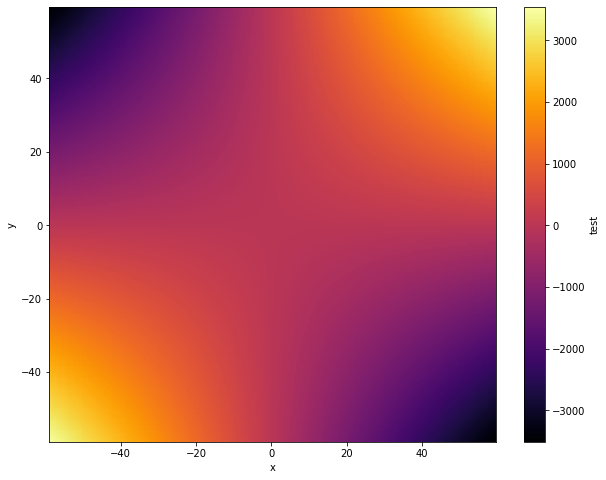

In [80]:
def plot_grid(df,xvar='x',yvar='y',zvar='acc'):
    #get the number of xbins/ybins (assumes square grid)
    bins = df[xvar].nunique()
    
    fig = plt.figure(figsize=(10, 8))
    plt.hist2d(df[xvar], df[yvar], weights=df[zvar], bins=bins,cmap='inferno')
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(zvar)
    plt.close()
    return fig
plot_grid(df=df_blank,zvar='test')

In [81]:
df_blank.isnull().values.any()

False

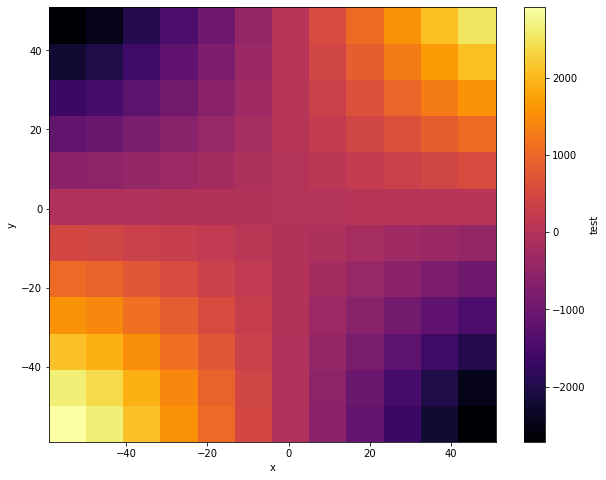

In [82]:
df_newbinning = rebin_df(df_blank,edge=59,step=10,zvar='test')
plot_grid(df=df_newbinning,zvar='test')

In [83]:
df_newbinning.isnull().values.any()

False

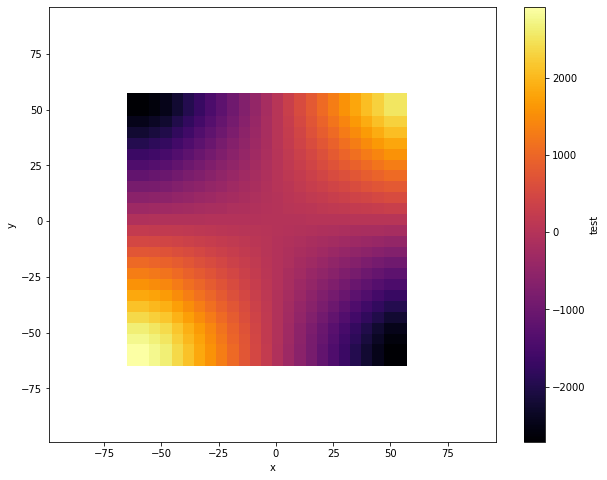

In [93]:
df_newbinning_fine = rebin_df(df_newbinning,edge=99,step=5,zvar='test')
plot_grid(df=df_newbinning_fine,zvar='test')

In [94]:
df_newbinning_fine.isnull().values.any()

True